# Function examples

In [1]:
# Initialize
import numpy as np
import matplotlib.pyplot as plt
from src.piecewise.polynomial import Polynomial
from src.piecewise.branch import Branch
from src.piecewise.function import Function

## Example 1: Basic usage - single branch

f1 = 
[1. 0.] / [1.] on [0.0,2.0]
Number of branches: 1
Breakpoints: [0. 2.]
Global support: (0.0, 2.0)


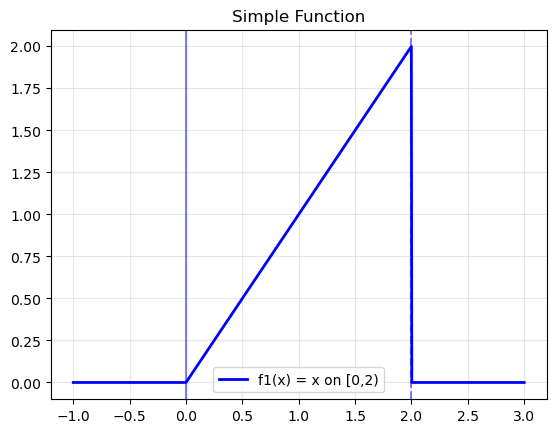

In [2]:
# Δημιουργία απλού Branch
b1 = Branch(
    support=[0, 2],
    numerator=Polynomial([1, 0]),  # x
    includes_left_boundary=True,
    includes_right_boundary=False,
    name="Linear"
)

f1 = Function(b1, name="Simple function")
print(f"f1 = {f1}")
print(f"Number of branches: {f1.nr_branches}")
print(f"Breakpoints: {f1.breakpoints}")
print(f"Global support: {f1.global_support}")

# Graph
x = np.linspace(-1, 3, 1000)
plt.plot(x, f1(x), 'b-', linewidth=2, label='f1(x) = x on [0,2)')
plt.axvline(x=0, color='blue', linestyle='-', alpha=0.5)
plt.axvline(x=2, color='blue', linestyle='--', alpha=0.5)
plt.title('Simple Function')
plt.legend()
plt.grid(True, alpha=0.3)

## Example 2: Piecewise function

f2 = 
[1. 0.] / [1.] on [0.0,1.0)
[-1.  2.] / [1.] on [1.0,2.0]
Number branches: 2
Breakpoints: [0. 1. 2.]


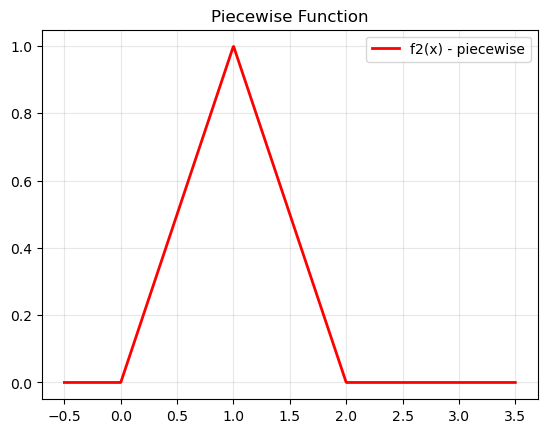

In [3]:
# Create multiple branches
branches = [
    Branch(support=[0, 1], numerator=Polynomial([1, 0]), name="x", includes_right_boundary=False),  # x on [0,1]
    Branch(support=[1, 2], numerator=Polynomial([-1, 2]), name="2-x", includes_right_boundary=False),  # 2-x on [1,2]
]

f2 = Function(branches, name="Triangle")
print(f"f2 = {f2}")
print(f"Number branches: {f2.nr_branches}")
print(f"Breakpoints: {f2.breakpoints}")

x = np.linspace(-0.5, 3.5, 1000)
plt.plot(x, f2(x), 'r-', linewidth=2, label='f2(x) - piecewise')
plt.title('Piecewise Function')
plt.legend()
plt.grid(True, alpha=0.3)


## Example 3: Adding Functions

f3 = 
[1. 0. 0.] / [1.] on [0.0,2.0]
f4 = 
[1.] / [1.] on [1.0,3.0]
f3 + f4 has 3 branches


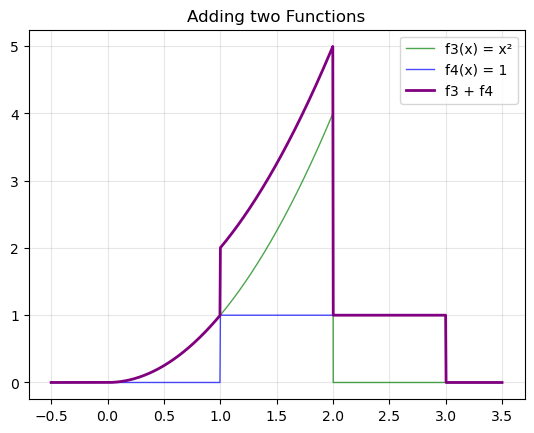

In [4]:
# Create two Functions
b3 = Branch(support=[0, 2], numerator=Polynomial([1, 0, 0]), name="x²")  # x² on [0,2]
b4 = Branch(support=[1, 3], numerator=Polynomial([1]), name="1")  # 1 on [1,3]

f3 = Function(b3, name="Quadratic")
f4 = Function(b4, name="Constant")

f_sum = f3 + f4
print(f"f3 = {f3}")
print(f"f4 = {f4}")
print(f"f3 + f4 has {f_sum.nr_branches} branches")

x = np.linspace(-0.5, 3.5, 1000)
plt.plot(x, f3(x), 'g-', linewidth=1, label='f3(x) = x²', alpha=0.7)
plt.plot(x, f4(x), 'b-', linewidth=1, label='f4(x) = 1', alpha=0.7)
plt.plot(x, f_sum(x), 'purple', linewidth=2, label='f3 + f4')
plt.title('Adding two Functions')
plt.legend()
plt.grid(True, alpha=0.3)

## Example 4 Multiplying Functions

f3 * f4 has 1 branches


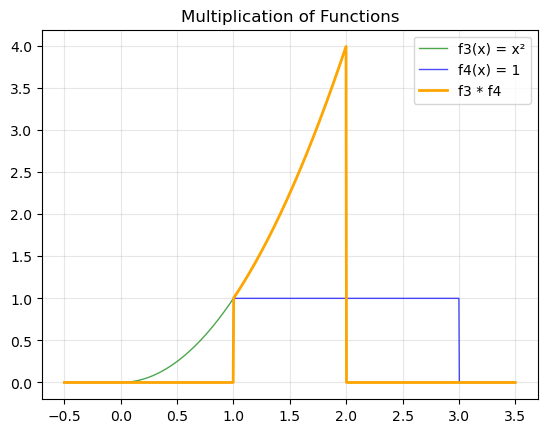

In [5]:
f_prod = f3 * f4
print(f"f3 * f4 has {f_prod.nr_branches} branches")

x = np.linspace(-0.5, 3.5, 1000)
plt.plot(x, f3(x), 'g-', linewidth=1, label='f3(x) = x²', alpha=0.7)
plt.plot(x, f4(x), 'b-', linewidth=1, label='f4(x) = 1', alpha=0.7)
plt.plot(x, f_prod(x), 'orange', linewidth=2, label='f3 * f4')
plt.title('Multiplication of Functions')
plt.legend()
plt.grid(True, alpha=0.3)

## Example 5: Derivation and Integration

f2' has 2 branches
∫₀³ f2(x) dx = 1.000000 (error: 0.00e+00)


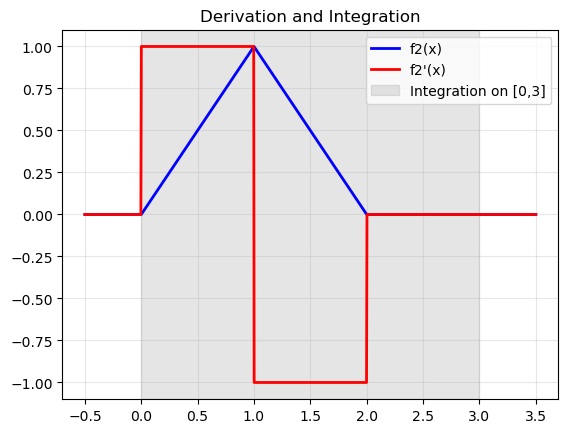

In [6]:
# Derivation
f2_prime = f2.diff(1, name="f2'")
print(f"f2' has {f2_prime.nr_branches} branches")

# Integration
integral, error = f2.integral(0, 3)
print(f"∫₀³ f2(x) dx = {integral:.6f} (error: {error:.2e})")

x = np.linspace(-0.5, 3.5, 1000)
plt.plot(x, f2(x), 'b-', linewidth=2, label='f2(x)')
plt.plot(x, f2_prime(x), 'r-', linewidth=2, label="f2'(x)")
plt.axvspan(0, 3, alpha=0.2, color='gray', label='Integration on [0,3]')
plt.title('Derivation and Integration')
plt.legend()
plt.grid(True, alpha=0.3)

## Example 6: Shifting and Scaling

f2 shift(1): 2 branches
f2 scale(2): 2 branches


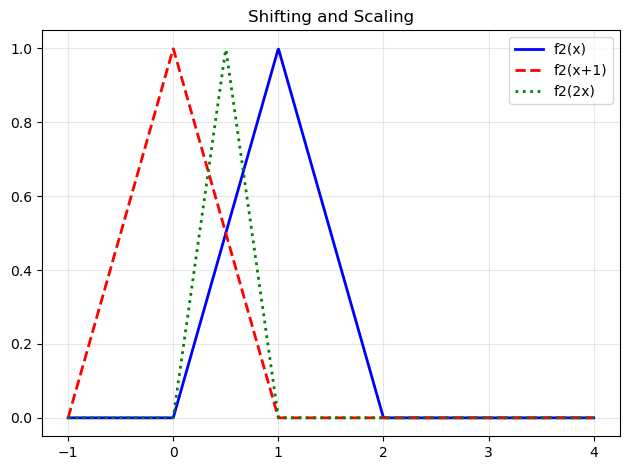

In [7]:
f_shifted = f2.shift(1, name="f2(x+1)")
f_scaled = f2.scale(2, name="f2(2x)")

print(f"f2 shift(1): {f_shifted.nr_branches} branches")
print(f"f2 scale(2): {f_scaled.nr_branches} branches")

x = np.linspace(-1, 4, 1000)
plt.plot(x, f2(x), 'blue', linewidth=2, label='f2(x)')
plt.plot(x, f_shifted(x), 'red', linewidth=2, label='f2(x+1)', linestyle='--')
plt.plot(x, f_scaled(x), 'green', linewidth=2, label='f2(2x)', linestyle=':')
plt.title('Shifting and Scaling')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Example 7: Rational Functions

Rational function: 2 branches


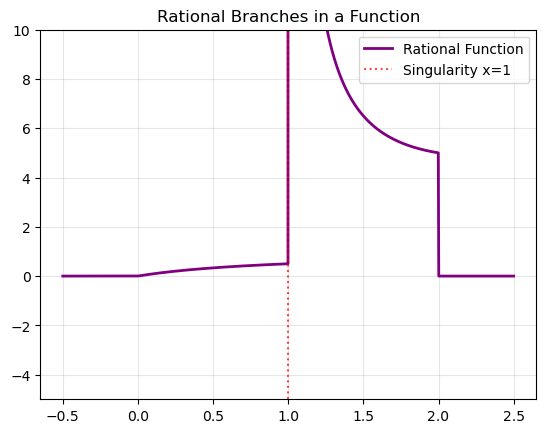

In [8]:
# Create Function with Rational Branches
rational_branches = [
    Branch(
        support=[0, 1], 
        numerator=Polynomial([1, 0]),  # x
        denominator=Polynomial([1, 1]),  # x + 1
        includes_right_boundary=False,
        name="x/(x+1)"
    ),
    Branch(
        support=[1, 2],
        numerator=Polynomial([1, 0, 1]),  # x² + 1
        denominator=Polynomial([1, -1]),  # x - 1
        name="(x²+1)/(x-1)"
    )
]

f_rational = Function(rational_branches, name="Rational Function")
print(f"Rational function: {f_rational.nr_branches} branches")

x = np.linspace(-0.5, 2.5, 1000)
x_safe = x[(x != -1) & (x != 1)]  # Avoid singularities
plt.plot(x_safe, f_rational(x_safe), 'purple', linewidth=2, label='Rational Function')
plt.axvline(x=1, color='red', linestyle=':', alpha=0.7, label='Singularity x=1')
plt.ylim(-5, 10)
plt.title('Rational Branches in a Function')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Example 8: Normalization and extreme values

f3 extreme value: 2.000
f3_normalized extreme value: 1.000


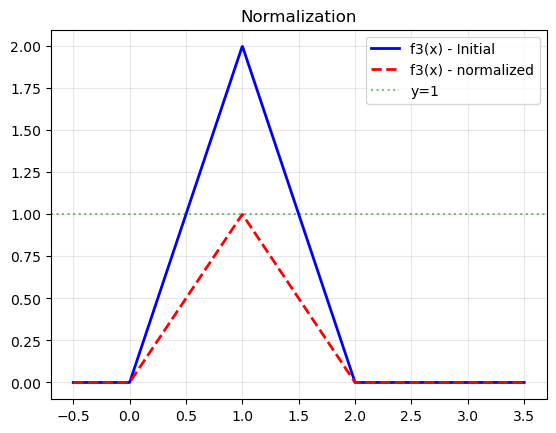

In [9]:
f3 = 2*f2
print(f"f3 extreme value: {f3.extreme:.3f}")
f3_normalized = f3.normalize(copy=True)
print(f"f3_normalized extreme value: {f3_normalized.extreme:.3f}")

x = np.linspace(-0.5, 3.5, 1000)
plt.plot(x, f3(x), 'blue', linewidth=2, label='f3(x) - Initial')
plt.plot(x, f3_normalized(x), 'red', linewidth=2, label='f3(x) - normalized', linestyle='--')
plt.axhline(y=1, color='green', linestyle=':', alpha=0.5, label='y=1')
plt.title('Normalization')
plt.legend()
plt.grid(True, alpha=0.3)

## Example 9: Inversion

1/f_rational: 2 branches
f3 / f4: 1 branches


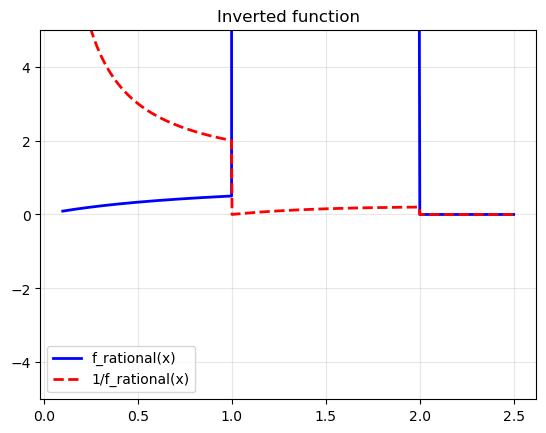

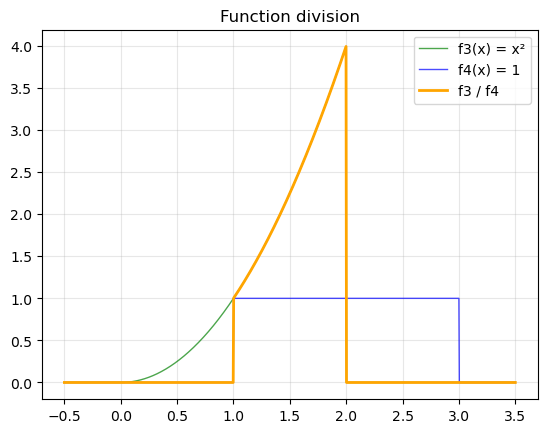

In [10]:
# Create two Functions
b3 = Branch(support=[0, 2], numerator=Polynomial([1, 0, 0]), name="x²")  # x² on [0,2]
b4 = Branch(support=[1, 3], numerator=Polynomial([1]), name="1")  # 1 on [1,3]

f3 = Function(b3, name="Quadratic")
f4 = Function(b4, name="Constant")


f_inv = f_rational.updown()
f_div = f3 / f4

print(f"1/f_rational: {f_inv.nr_branches} branches")
print(f"f3 / f4: {f_div.nr_branches} branches")

x = np.linspace(0.1, 2.5, 1000)
x_safe = x[x != 1] # Avoid singularity
plt.plot(x_safe, f_rational(x_safe), 'blue', linewidth=2, label='f_rational(x)')
plt.plot(x_safe, f_inv(x_safe), 'red', linewidth=2, label='1/f_rational(x)', linestyle='--')
plt.ylim(-5, 5)
plt.title('Inverted function')
plt.legend()
plt.grid(True, alpha=0.3)

plt.figure()
x = np.linspace(-0.5, 3.5, 1000)
plt.plot(x, f3(x), 'green', linewidth=1, label='f3(x) = x²', alpha=0.7)
plt.plot(x, f4(x), 'blue', linewidth=1, label='f4(x) = 1', alpha=0.7)
plt.plot(x, f_div(x), 'orange', linewidth=2, label='f3 / f4')
plt.title('Function division')
plt.legend()
plt.grid(True, alpha=0.3)

## Example 10: Breakpoints analysis

In [11]:
print(f"f2 breakpoints: {f2.breakpoints}")
print(f"f2 global support: {f2.global_support}")

# Test branches at various intervals
test_intervals = [[0, 0.5], [0.5, 1.5], [1.5, 2.5], [2.5, 3.5]]
for interval in test_intervals:
    branch_ids = f2.branches_in_interval(interval)
    print(f"Interval {interval}: branches {branch_ids}")


f2 breakpoints: [0. 1. 2.]
f2 global support: (0.0, 2.0)
Interval [0, 0.5]: branches [0]
Interval [0.5, 1.5]: branches [1]
Interval [1.5, 2.5]: branches [1]
Interval [2.5, 3.5]: branches []


## Example 11: Show in Latex

In [13]:
from IPython.display import display, Math
display(Math(f_rational.to_latex('x')))

<IPython.core.display.Math object>